In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

In [32]:
def readData():
    data = pd.read_csv('HW_PCA_SHOPPING_CART_v896.csv')
    data = data.drop(['ID'], axis=1)
    return np.array(data)
    

In [48]:
def K_Means(data):
    N_CLUSTERS = 6
    kmeans = KMeans(n_clusters = N_CLUSTERS, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(data)
    print(type(y_kmeans))
    temp = (y_kmeans == 0)
    print(data[y_kmeans == 0, 0])
    index_x = 0
    index_y = 8
    plt.scatter(data[y_kmeans == 0, index_x], data[y_kmeans == 0, index_y], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(data[y_kmeans == 1, index_x], data[y_kmeans == 1, index_y], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(data[y_kmeans == 2, index_x], data[y_kmeans == 2, index_y], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(data[y_kmeans == 3, index_x], data[y_kmeans == 3, index_y], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(data[y_kmeans == 4, index_x], data[y_kmeans == 4, index_y], s = 100, c = 'magenta', label = 'Cluster 5')
    plt.scatter(data[y_kmeans == 5, index_x], data[y_kmeans == 5, index_y], s = 100, c = 'orange', label = 'Cluster 6')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
    plt.title('Clusters of Customers')
    plt.legend()
    plt.show()
    

<class 'numpy.ndarray'>
[4 1 1 2 3 1 2 3 3 0 1 2 2 2 4 3 2 1 2 4 0 3 5 4 2 3 2 0 4 1 2 1 2 2 0 1 0
 1 2 4 4 1 2 1 0 2 3 3 1 1 4 4 1 2 1 3 2 3 3 2 2 5 2 1 1 2 0 2 1 4 1 4 2 2
 3 2 5 2 2 4 1 0 1 3 2 2 0 2 0 3 4 2 1 2 1 4 2 2 1 1 3 1 3 2 1 2 3 3 1 1 2
 2 3 2 2 5 0 3 3 1 3]


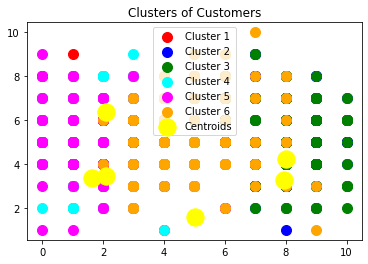

In [49]:
data = readData()
K_Means(data)
